<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [112]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [113]:
from bs4 import BeautifulSoup
import requests

# Read job listings into a dataframe
df_job_lstgs = pd.read_csv("data/job_listings.csv")

In [114]:
df_job_lstgs_wrk = df_job_lstgs.copy()
df_job_lstgs_wrk.drop(['Unnamed: 0'], axis=1)

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist
...,...,...
421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer
422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...
423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance
424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist


In [115]:
# Define regular expressions
rgxFunkyLeadingb = re.compile(r'^b(\"|\')')
rgxTrailingQuote = re.compile(r'(\"|\')$')

# strip_bookends strips the non-standard leading and trailing characters
def strip_bookends(val):
    tmp = re.sub(rgxFunkyLeadingb, "", val)
    tmp = re.sub(rgxTrailingQuote, "", tmp)
    
    return tmp

In [116]:
# Execute the stripping function
df_job_lstgs_wrk['description_upd'] = df_job_lstgs_wrk['description'].apply(strip_bookends)
df_job_lstgs_wrk

,Unnamed: 0,description,title,description_upd
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,<div><div>Job Requirements:</div><ul><li><p>\n...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,<div>Job Description<br/>\n<br/>\n<p>As a Data...
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,<div><p>As a Data Scientist you will be workin...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"<div class=""jobsearch-JobMetadataHeader icl-u-..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,<ul><li>Location: USA \xe2\x80\x93 multiple lo...
...,...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,<b>About Us:</b><br/>\nWant to be part of a fa...
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,"<div class=""jobsearch-JobMetadataHeader icl-u-..."
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,"<div class=""jobsearch-JobMetadataHeader icl-u-..."
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\nJ...


In [117]:
# Reset the dataframe index
df_job_lstgs_wrk.reset_index(drop=True, inplace=True)
df_job_lstgs_wrk.columns

Index(['Unnamed: 0', 'description', 'title', 'description_upd'], dtype='object')

In [118]:
df_job_lstgs_wrk.drop(['Unnamed: 0'], axis=1)

,description,title,description_upd
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,<div><div>Job Requirements:</div><ul><li><p>\n...
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,<div>Job Description<br/>\n<br/>\n<p>As a Data...
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,<div><p>As a Data Scientist you will be workin...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"<div class=""jobsearch-JobMetadataHeader icl-u-..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,<ul><li>Location: USA \xe2\x80\x93 multiple lo...
...,...,...,...
421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,<b>About Us:</b><br/>\nWant to be part of a fa...
422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,"<div class=""jobsearch-JobMetadataHeader icl-u-..."
423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,"<div class=""jobsearch-JobMetadataHeader icl-u-..."
424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\nJ...


In [119]:
# Remove HTML tags in the description_upd column

# strip_html applies BeautifulSoup's get_text function to strip HTML tags from a string of text
def strip_html(txt):
    soup = BeautifulSoup(txt)
    return soup.get_text()

In [120]:
df_job_lstgs_wrk['description_upd'] = df_job_lstgs_wrk['description_upd'].apply(strip_html)
df_job_lstgs_wrk['description_upd']

0      Job Requirements:\nConceptual understanding in...
1      Job Description\n\nAs a Data Scientist 1, you ...
2      As a Data Scientist you will be working on con...
3      $4,969 - $6,756 a monthContractUnder the gener...
4      Location: USA \xe2\x80\x93 multiple locations\...
                             ...                        
421    About Us:\nWant to be part of a fantastic and ...
422    InternshipAt Uber, we ignite opportunity by se...
423    $200,000 - $350,000 a yearA million people a y...
424    SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nABOU...
425    Cerner Intelligence is a new, innovative organ...
Name: description_upd, Length: 426, dtype: object

## 2) Use Spacy to tokenize the listings 

In [121]:
from spacy.tokenizer import Tokenizer

# Import the large core english module
nlp = spacy.load("en_core_web_lg")

# Create the Tokenizer object
tokenizer = Tokenizer(nlp.vocab)

In [122]:
# Generate tokens
tmp_tokens = [] # working list of tokens

# Iterate through the dataframe column and generate tokens
for doc in tokenizer.pipe(df_job_lstgs_wrk['description_upd'], batch_size=1000):
    # Generate the tokens for this iteration (df row column)
    doc_tkns = [token.text for token in doc]
    # Append to our temporary/working list of tokens
    tmp_tokens.append(doc_tkns)
    
# Add the list of tokens to our dataframe as a column
df_job_lstgs_wrk['tokens'] = tmp_tokens

In [123]:
df_job_lstgs_wrk['tokens'].sample(20)

244    [Zeus, -, Flawless, Stays.\n\nFounded, in, Nov...
123    [Motiion, is, a, technology, and, data, compan...
125    [Part-time,, Temporary,, InternshipBMW, Techno...
144    [Position, Description\nWe,, Smart, Pricing,, ...
157    [Channel, and, Intellectual, Property, Protect...
309    [ContractJob, Description\nWhat, You\xe2\x80\x...
284    [Socure, is, headquartered, in, NYC, and, is, ...
97     [We\'re, looking, for, Data, Scientists, who, ...
111    [Mine, rich, user, data, sets, and, find, insi...
415    [Temporary,, Internship\nThe, Marketing, Data,...
188    [Conducts, research, using, advanced, statisti...
55     [Senior, Data, Scientist-19000BN4\n\n\nPreferr...
330    [Location:, San, Jose,, CA\n\nAbout, Outward,,...
198    [Sr., Data, Scientist-1901744\nDescription\nTh...
62     [Business, Unit, Introduction:\n\nThis, positi...
11     [Part-timeAbout, The, Opportunity\nHere, at, G...
211    [CommissionAt, Red, Hat,, we, connect, an, inn...
273    [Join, a, team, recogniz

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [124]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vect = CountVectorizer(stop_words='english')

# Build a vocabulary against our universe of tokens
vect.fit(df_job_lstgs_wrk['description_upd'])

# transform text
dtm = vect.transform(df_job_lstgs_wrk['description_upd'])

In [125]:
dtm.shape

(426, 9816)

In [126]:
print(vect.get_feature_names()[:40])

['00', '000', '02115', '03', '0356', '04', '062', '06366', '08', '10', '100', '1000', '1001', '1008', '100k', '100x', '105', '1079302', '1082692', '10b', '10ms', '10x', '11', '110k', '112', '114157802', '12', '120', '125', '126', '130', '1315', '1324b', '138', '14', '140', '15', '150', '15000', '159m']


## 4) Visualize the most common word counts

In [127]:
# Condense the CountVectorizer transformation to a sparse matrix
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]])

In [128]:
# Generate a Word Count dataframe indicating the word count for each document
dtm_wc = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm_wc

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
dtm_wc_sum = dtm_wc.sum()
dtm_wc_sum

00             1
000           52
02115          1
03             2
0356           1
              ..
zillow         7
zones          1
zoom           1
zuckerberg     2
zurich         2
Length: 9816, dtype: int64

In [130]:
# Determine the word count for 'collaborate'
dtm_wc_sum_sort = dtm_wc_sum.sort_values(ascending=False)


dtm_wc_sum_sort[:20]

data           4394
xe2            1417
x80            1404
experience     1238
business       1198
work            976
team            972
science         956
learning        912
analytics       730
machine         686
analysis        675
skills          673
nexperience     616
models          614
product         578
statistical     566
x99s            564
solutions       530
new             527
dtype: int64

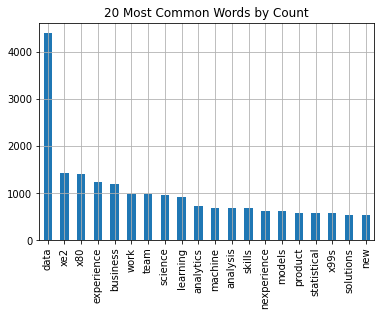

In [131]:
dtm_wc_sum_sort[:20].plot(kind='bar', title='20 Most Common Words by Count', grid=True);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english',
                        ngram_range = (1,2),
                        max_features = 2500)

# Create a vocabulary and tf-idf score per document
dtm = tfidf.fit_transform(df_job_lstgs_wrk['description_upd'])

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(426, 2500)


,000,10,100,12,12 months,20,2019,3rd,40,500,...,years experience,years hands,years industry,years professional,years relevant,years work,years xe2,york,york city,zf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [133]:
from sklearn.neighbors import NearestNeighbors

# Fit on the nearest neighbors model TF-IDF feature matrix created above 
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [134]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.25102878, 1.27039645, 1.27902195, 1.27902195]]),
 array([[  0, 338, 403, 138,  42]]))

In [135]:
my_job_description = ["""What You'll Do:
Teach guided projects in PST morning hours, working closely with Team Leads and monitoring overall student participation and performance
Review curriculum with cohort Team Leads (TLs) and Section Leads (SLs) so they can better support students in absorbing the instruction content
Deliver curriculum that produces job market ready graduates
Collaborate with curriculum team on the development of Data Science curriculum, providing strong subject-matter expertise to ensure curriculum reflects current and robust Data Science practices
Coordinate cross functionally across multiple teams to contribute to the goals and initiatives of the Data Science program in conjunction with learning leadership plans and objectives
Provide strong subject-matter expertise in Data Science, including foundational mathematics/statistics, practical software and data pipeline development, and current techniques such as neural networks and NLP
Report to the Data Science Program Manager, providing details of status and student performance for the portion of curriculum you are responsible for
What You'll Need:
If your highest education is High School Diploma or GED, you are required to have 5+ years of working experience in the Data Science industry
If your highest education is a College Degree (proof required), you are required to have 3+ years of working experience in the technical field
General Python skills, and experience with the Python Data Science ecosystem (pandas, numpy, scikit-learn, etc.)
Strong subject-matter expertise in Data Science - being broadly aware of practices, and knowing at least a few subtopics in depth
Experience in teaching and/or curriculum design
Excellent written and verbal communication skills; comfortable and compelling in public speaking situations
Ability to work with a diverse group of individuals
Self-starting with the ability to effectively work autonomously with little oversight
Intelligent, dedicated, flexible with a willingness to experiment
Have an interest in keeping up with the latest information in your field
Bonus If You:
Have experience with data engineering work at scale in real applications
Are familiar with Zoom, Slack, or Notion 
Have a well known blog or high traffic Youtube channel focusing on Data Science
Have presented at or have run local tech meet-ups
Have prior rapid growth start up experience"""]

In [136]:
# Score the "new" document
new_doc_score = tfidf.transform(my_job_description)

# Execute the nearest neighbors model using the newly scored document
nn.kneighbors(new_doc_score.todense())

(array([[1.21994885, 1.21994885, 1.22511587, 1.22975701, 1.23342837]]),
 array([[400, 277, 201, 291, 401]]))

In [137]:
# Print out the most relevant document
df_job_lstgs_wrk['description_upd'][400]

'Purpose & Overall Relevance for the Organization:\\n\\nThis role will be responsible for researching, designing, engineering, and scaling advanced analytics models (statistical, neural networks, genetic algorithms, and others) in a designated area such as \\xe2\\x80\\x9ccustomer\\xe2\\x80\\x9d, \\xe2\\x80\\x9cquality\\xe2\\x80\\x9d, \\xe2\\x80\\x9cplant\\xe2\\x80\\x9d etc. The role will be tightly interlinked to ZF\\xe2\\x80\\x99s divisions / functions and IT, closely partnering with respective technical and business teams and data subject matter experts to deliver a comprehensive model strategy, roadmap, and actual models leveraging data sets synthesized from multiple data sources by the data engineering teams. The Principal Data Scientist will constantly seek to improve the performance and business impact of Advanced Analytical Models, as well as support the Digital Monetization team in monetization of Data and Analytics.\\n\\nPrincipal Subject Matter Expert for Data Science:\\nServ

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 